## **Install packgaes**

In [ ]:
!pip install instaloader
!pip install emoji
!pip install google-cloud-vision
!pip install textblob
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## **Import required modules**

In [ ]:
import instaloader
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import emoji
from textblob import TextBlob
import datetime

## **Loading dataset**

In [2]:
# Step 3: Initialize Instaloader instance
L = instaloader.Instaloader()

# Step 4: Set the sessionid manually
sessionid = '9140509284%3AlRVYTG9HLi7hmg%3A11%3AAYfG5CRCc4ZB_4aJ2s23i4WQlkIqiSyq5V1EQ-6ULw'
L.context._session.cookies.set('sessionid', sessionid)

Cookie(version=0, name='sessionid', value='9140509284%3AlRVYTG9HLi7hmg%3A11%3AAYfG5CRCc4ZB_4aJ2s23i4WQlkIqiSyq5V1EQ-6ULw', port=None, port_specified=False, domain='', domain_specified=False, domain_initial_dot=False, path='/', path_specified=True, secure=False, expires=None, discard=True, comment=None, comment_url=None, rest={'HttpOnly': None}, rfc2109=False)

In [ ]:
# Step 5: Specify the username whose data you want to collect
target_username = 'natgeo'  # Change to your desired account
profile = instaloader.Profile.from_username(L.context, target_username)

# Step 6: Create DataFrame to store post details
posts_df = pd.DataFrame(columns=['post_url', 'num_comments', 'num_likes', 'caption', 'is_video'])


In [4]:
# Step 7: Fetch posts (Fixed for pandas 2.x)
post_url_structure = 'https://www.instagram.com/p/{}/'
num_posts_to_extract = 100
number = 0

# Create a list to collect post dictionaries
post_data = []

print("Fetching posts...")

for post in profile.get_posts():
    if number >= num_posts_to_extract:
        break

    shortcode = post.shortcode
    post_url = post_url_structure.format(shortcode)
    caption = post.caption if post.caption else ""

    post_data.append({
        'post_url': post_url,
        'num_comments': post.comments,
        'num_likes': post.likes,
        'caption': caption[:300],
        'is_video': post.is_video
    })

    number += 1
    if number % 20 == 0:
        print(f"{number} posts fetched...")

print("Done!")

# Convert list of dictionaries to DataFrame
posts_df = pd.DataFrame(post_data)

# Step 8: Preview the dataset
posts_df.head()


Fetching posts...


JSON Query to graphql/query: 403 Forbidden when accessing https://www.instagram.com/graphql/query [retrying; skip with ^C]
JSON Query to graphql/query: 403 Forbidden when accessing https://www.instagram.com/graphql/query [retrying; skip with ^C]
JSON Query to graphql/query: 403 Forbidden when accessing https://www.instagram.com/graphql/query [retrying; skip with ^C]
JSON Query to graphql/query: 403 Forbidden when accessing https://www.instagram.com/graphql/query [retrying; skip with ^C]
JSON Query to graphql/query: 403 Forbidden when accessing https://www.instagram.com/graphql/query [retrying; skip with ^C]
JSON Query to graphql/query: 403 Forbidden when accessing https://www.instagram.com/graphql/query [retrying; skip with ^C]
JSON Query to graphql/query: 403 Forbidden when accessing https://www.instagram.com/graphql/query [retrying; skip with ^C]
JSON Query to graphql/query: 403 Forbidden when accessing https://www.instagram.com/graphql/query [retrying; skip with ^C]
JSON Query to gr

20 posts fetched...


JSON Query to graphql/query: 403 Forbidden when accessing https://www.instagram.com/graphql/query [retrying; skip with ^C]
JSON Query to graphql/query: 403 Forbidden when accessing https://www.instagram.com/graphql/query [retrying; skip with ^C]
JSON Query to graphql/query: 403 Forbidden when accessing https://www.instagram.com/graphql/query [retrying; skip with ^C]
JSON Query to graphql/query: 403 Forbidden when accessing https://www.instagram.com/graphql/query [retrying; skip with ^C]
JSON Query to graphql/query: 403 Forbidden when accessing https://www.instagram.com/graphql/query [retrying; skip with ^C]
JSON Query to graphql/query: 403 Forbidden when accessing https://www.instagram.com/graphql/query [retrying; skip with ^C]
JSON Query to graphql/query: 403 Forbidden when accessing https://www.instagram.com/graphql/query [retrying; skip with ^C]
JSON Query to graphql/query: 403 Forbidden when accessing https://www.instagram.com/graphql/query [retrying; skip with ^C]
JSON Query to gr

40 posts fetched...


JSON Query to graphql/query: 403 Forbidden when accessing https://www.instagram.com/graphql/query [retrying; skip with ^C]
JSON Query to graphql/query: 403 Forbidden when accessing https://www.instagram.com/graphql/query [retrying; skip with ^C]
JSON Query to graphql/query: 403 Forbidden when accessing https://www.instagram.com/graphql/query [retrying; skip with ^C]
JSON Query to graphql/query: 403 Forbidden when accessing https://www.instagram.com/graphql/query [retrying; skip with ^C]
JSON Query to graphql/query: 403 Forbidden when accessing https://www.instagram.com/graphql/query [retrying; skip with ^C]
JSON Query to graphql/query: 403 Forbidden when accessing https://www.instagram.com/graphql/query [retrying; skip with ^C]
JSON Query to graphql/query: 403 Forbidden when accessing https://www.instagram.com/graphql/query [retrying; skip with ^C]
JSON Query to graphql/query: 403 Forbidden when accessing https://www.instagram.com/graphql/query [retrying; skip with ^C]
JSON Query to gr

60 posts fetched...


JSON Query to graphql/query: 403 Forbidden when accessing https://www.instagram.com/graphql/query [retrying; skip with ^C]
JSON Query to graphql/query: 403 Forbidden when accessing https://www.instagram.com/graphql/query [retrying; skip with ^C]
JSON Query to graphql/query: 403 Forbidden when accessing https://www.instagram.com/graphql/query [retrying; skip with ^C]
JSON Query to graphql/query: 403 Forbidden when accessing https://www.instagram.com/graphql/query [retrying; skip with ^C]
JSON Query to graphql/query: 403 Forbidden when accessing https://www.instagram.com/graphql/query [retrying; skip with ^C]
JSON Query to graphql/query: 403 Forbidden when accessing https://www.instagram.com/graphql/query [retrying; skip with ^C]
JSON Query to graphql/query: 403 Forbidden when accessing https://www.instagram.com/graphql/query [retrying; skip with ^C]
JSON Query to graphql/query: 403 Forbidden when accessing https://www.instagram.com/graphql/query [retrying; skip with ^C]
JSON Query to gr

80 posts fetched...


JSON Query to graphql/query: 403 Forbidden when accessing https://www.instagram.com/graphql/query [retrying; skip with ^C]
JSON Query to graphql/query: 403 Forbidden when accessing https://www.instagram.com/graphql/query [retrying; skip with ^C]
JSON Query to graphql/query: 403 Forbidden when accessing https://www.instagram.com/graphql/query [retrying; skip with ^C]
JSON Query to graphql/query: 403 Forbidden when accessing https://www.instagram.com/graphql/query [retrying; skip with ^C]
JSON Query to graphql/query: 403 Forbidden when accessing https://www.instagram.com/graphql/query [retrying; skip with ^C]
JSON Query to graphql/query: 403 Forbidden when accessing https://www.instagram.com/graphql/query [retrying; skip with ^C]
JSON Query to graphql/query: 403 Forbidden when accessing https://www.instagram.com/graphql/query [retrying; skip with ^C]
JSON Query to graphql/query: 403 Forbidden when accessing https://www.instagram.com/graphql/query [retrying; skip with ^C]
JSON Query to gr

100 posts fetched...
Done!


,post_url,num_comments,num_likes,caption,is_video
0,https://www.instagram.com/p/DQExTPtje5H/,204,15836,Looking for your next adventure? National Geog...,True
1,https://www.instagram.com/p/DQWql3oAAXX/,8,849,"Soar above the Georgian Old Town of Hull, Engl...",True
2,https://www.instagram.com/p/DQU4LdyAJ78/,450,33800,If you’re sending a robot to another world to ...,False
3,https://www.instagram.com/p/DQUl78giWKz/,234,92925,Photos by @babaktafreshi | Shown here is Comet...,False
4,https://www.instagram.com/p/DQUZCMdgJF9/,108,16187,"Beneath the streets of Paris, the bones of nea...",True


In [5]:
posts_df.head(25)

,post_url,num_comments,num_likes,caption,is_video
0,https://www.instagram.com/p/DQExTPtje5H/,204,15836,Looking for your next adventure? National Geog...,True
1,https://www.instagram.com/p/DQWql3oAAXX/,8,849,"Soar above the Georgian Old Town of Hull, Engl...",True
2,https://www.instagram.com/p/DQU4LdyAJ78/,450,33800,If you’re sending a robot to another world to ...,False
3,https://www.instagram.com/p/DQUl78giWKz/,234,92925,Photos by @babaktafreshi | Shown here is Comet...,False
4,https://www.instagram.com/p/DQUZCMdgJF9/,108,16187,"Beneath the streets of Paris, the bones of nea...",True
5,https://www.instagram.com/p/DQT3P49DRf6/,455,56606,"On October 15, 2025, @jimwmorrison completed t...",True
6,https://www.instagram.com/p/DQREME6kyIP/,75,26268,Photo by @joelsartore | Named for their wiggly...,False
7,https://www.instagram.com/p/DQPsFOPjhRs/,311,48936,Once believed to be a safe haven for marine li...,False
8,https://www.instagram.com/p/DQRf2VwADOi/,121,31350,"Hiking is a way of life in South Korea, where ...",True
9,https://www.instagram.com/p/DQNbb77k5Kx/,253,45328,Generation after generation of bearded vulture...,False


In [6]:
# Add new features
posts_df['caption_length'] = posts_df['caption'].apply(len)
posts_df['has_hashtag'] = posts_df['caption'].apply(lambda x: '#' in x)
posts_df['has_mention'] = posts_df['caption'].apply(lambda x: '@' in x)

In [9]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

## **Extracting Features from post**

In [14]:
import re
import emoji
from datetime import datetime

# Extract hashtags
def count_hashtags(caption):
    return len(re.findall(r"#\w+", caption or ""))

# Extract mentions
def count_mentions(caption):
    return len(re.findall(r"@\w+", caption or ""))

# Extract emoji count
def count_emojis(caption):
    return sum(1 for char in caption if char in emoji.EMOJI_DATA)

# Extract post hour
def post_hour(post):
    return post.date_utc.hour

# usage for each post
posts_data = []
for post in profile.get_posts():
    posts_data.append({
        "url": post.url,
        "caption": post.caption or "",
        "likes": post.likes,
        "comments": post.comments,
        "hour": post.date_utc.hour
    })
    if len(posts_data) >= 20:  # limited
        break

# Save to file
import json
with open("posts_data.json", "w") as f:
    json.dump(posts_data, f)


JSON Query to graphql/query: 403 Forbidden when accessing https://www.instagram.com/graphql/query [retrying; skip with ^C]
JSON Query to graphql/query: 403 Forbidden when accessing https://www.instagram.com/graphql/query [retrying; skip with ^C]
JSON Query to graphql/query: 403 Forbidden when accessing https://www.instagram.com/graphql/query [retrying; skip with ^C]
JSON Query to graphql/query: 403 Forbidden when accessing https://www.instagram.com/graphql/query [retrying; skip with ^C]
JSON Query to graphql/query: 403 Forbidden when accessing https://www.instagram.com/graphql/query [retrying; skip with ^C]
JSON Query to graphql/query: 403 Forbidden when accessing https://www.instagram.com/graphql/query [retrying; skip with ^C]
JSON Query to graphql/query: 403 Forbidden when accessing https://www.instagram.com/graphql/query [retrying; skip with ^C]
JSON Query to graphql/query: 403 Forbidden when accessing https://www.instagram.com/graphql/query [retrying; skip with ^C]
JSON Query to gr

In [15]:
# Feature Engineering
# Caption length
posts_df['caption_length'] = posts_df['caption'].apply(len)

# Hashtag & Mentions Coun
# t
posts_df['hashtag_count'] = posts_df['caption'].apply(lambda x: len(re.findall(r"#\w+", x)))
posts_df['mention_count'] = posts_df['caption'].apply(lambda x: len(re.findall(r"@\w+", x)))

# Emoji count
posts_df['emoji_count'] = posts_df['caption'].apply(lambda x: sum(1 for char in x if char in emoji.EMOJI_DATA))

# Engagement Rate (likes+comments / assume follower_count if available, else normalize by likes+comments)
if 'follower_count' in posts_df.columns:
    posts_df['engagement_rate'] = (posts_df['num_likes'] + posts_df['num_comments']) / posts_df['follower_count']
else:
    posts_df['engagement_rate'] = posts_df['num_likes'] + posts_df['num_comments']

# Posting hour and day of week
posts_df['posting_hour'] = posts_df['post_time'].dt.hour if 'post_time' in posts_df.columns else 0
posts_df['day_of_week'] = posts_df['post_time'].dt.day_name() if 'post_time' in posts_df.columns else 'Unknown'

# Sentiment polarity (TextBlob)
posts_df['sentiment'] = posts_df['caption'].apply(lambda x: TextBlob(x).sentiment.polarity)

 ## **GRAPHICAL ANALYSIS**

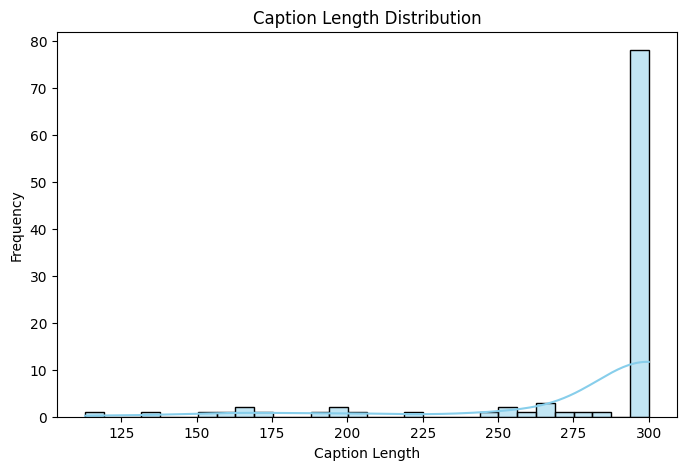

In [16]:
# 1. EDA Visualizations
# Caption length distribution
plt.figure(figsize=(8,5))
sns.histplot(posts_df['caption_length'], bins=30, kde=True, color="skyblue")
plt.title("Caption Length Distribution")
plt.xlabel("Caption Length")
plt.ylabel("Frequency")
plt.show()


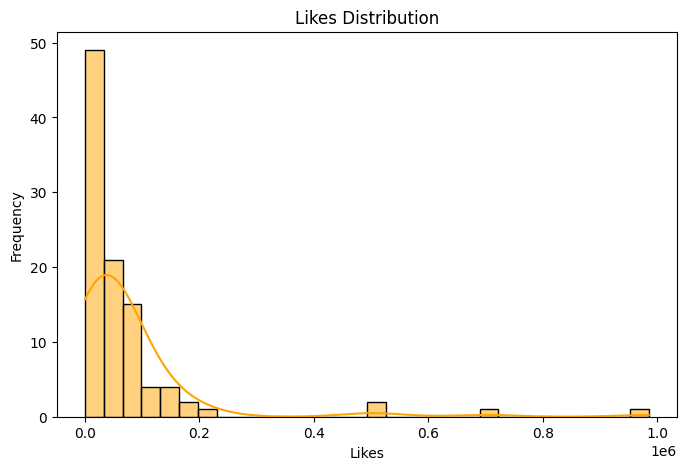

In [19]:
# Likes distribution
plt.figure(figsize=(8,5))
sns.histplot(posts_df['num_likes'], bins=30, kde=True, color="orange")
plt.title("Likes Distribution")
plt.xlabel("Likes")
plt.ylabel("Frequency")
plt.show()

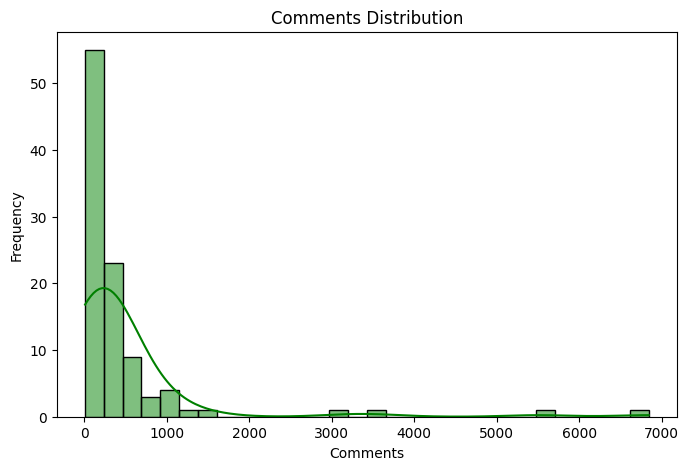

In [20]:
# Comments distribution
plt.figure(figsize=(8,5))
sns.histplot(posts_df['num_comments'], bins=30, kde=True, color="green")
plt.title("Comments Distribution")
plt.xlabel("Comments")
plt.ylabel("Frequency")
plt.show()

C:\Users\vasun\AppData\Local\Temp\ipykernel_3924\348210527.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hashtags_df, x='count', y='hashtag', palette="mako")


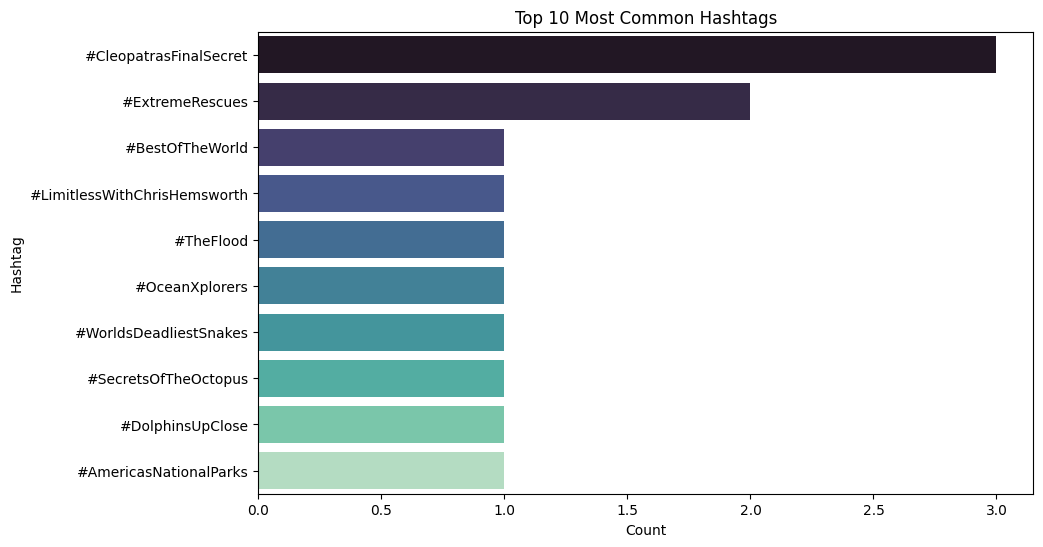

In [21]:
from collections import Counter

# Extract all hashtags into a list
all_hashtags = []
for cap in posts_df['caption']:
    all_hashtags.extend(re.findall(r"#\w+", cap))

hashtag_counts = Counter(all_hashtags).most_common(10)
hashtags_df = pd.DataFrame(hashtag_counts, columns=['hashtag','count'])

plt.figure(figsize=(10,6))
sns.barplot(data=hashtags_df, x='count', y='hashtag', palette="mako")
plt.title("Top 10 Most Common Hashtags")
plt.xlabel("Count")
plt.ylabel("Hashtag")
plt.show()



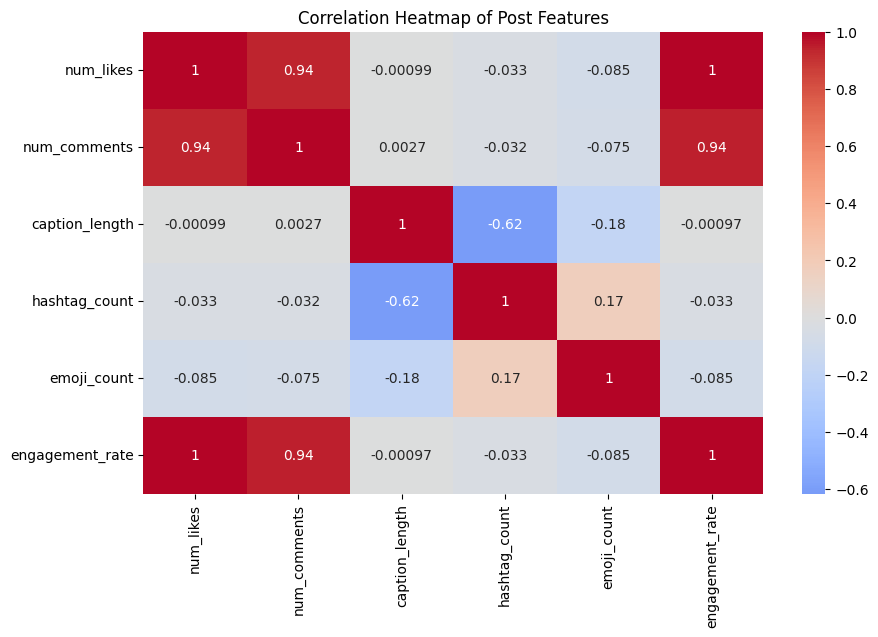

In [22]:
plt.figure(figsize=(10,6))
corr = posts_df[['num_likes','num_comments','caption_length','hashtag_count','emoji_count','engagement_rate']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Post Features")
plt.show()



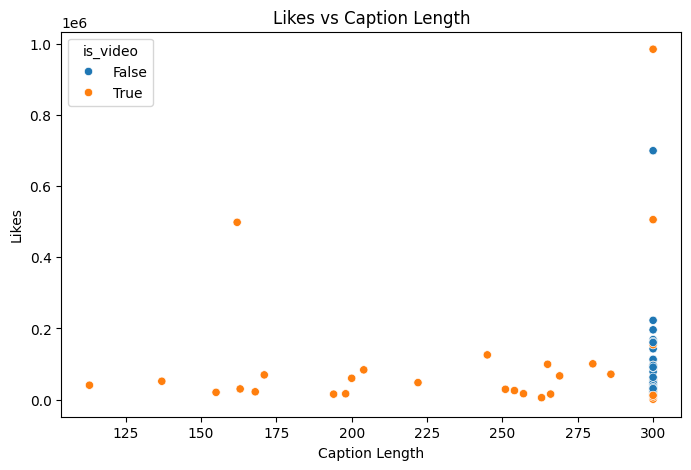

In [ ]:
# Feature Effects
# Likes vs Caption length
plt.figure(figsize=(8,5))
sns.scatterplot(data=posts_df, x='caption_length', y='num_likes', hue='is_video')
plt.title("Likes vs Caption Length")
plt.xlabel("Caption Length")
plt.ylabel("Likes")
plt.show()

C:\Users\vasun\AppData\Local\Temp\ipykernel_3924\1621411323.py:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=posts_df, x='hashtag_count', y='num_likes', inner="quart", scale="width")


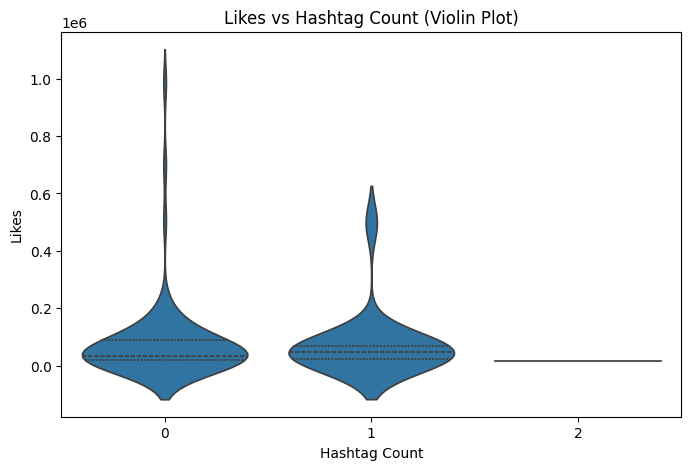

In [24]:
# Likes vs Hashtag Count (Violin)
plt.figure(figsize=(8,5))
sns.violinplot(data=posts_df, x='hashtag_count', y='num_likes', inner="quart", scale="width")
plt.title("Likes vs Hashtag Count (Violin Plot)")
plt.xlabel("Hashtag Count")
plt.ylabel("Likes")
plt.show()

C:\Users\vasun\AppData\Local\Temp\ipykernel_3924\1245692277.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=posts_df, x='is_video', y='num_likes', inner="quart", palette="Set2")


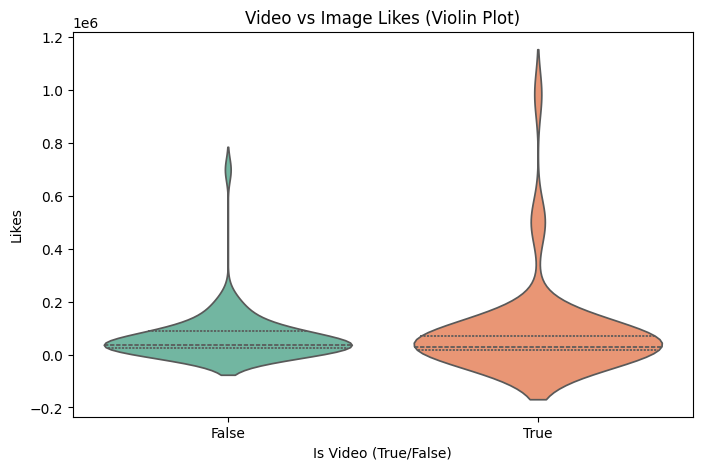

In [25]:
# Video vs Image Likes (Violin)
plt.figure(figsize=(8,5))
sns.violinplot(data=posts_df, x='is_video', y='num_likes', inner="quart", palette="Set2")
plt.title("Video vs Image Likes (Violin Plot)")
plt.xlabel("Is Video (True/False)")
plt.ylabel("Likes")
plt.show()

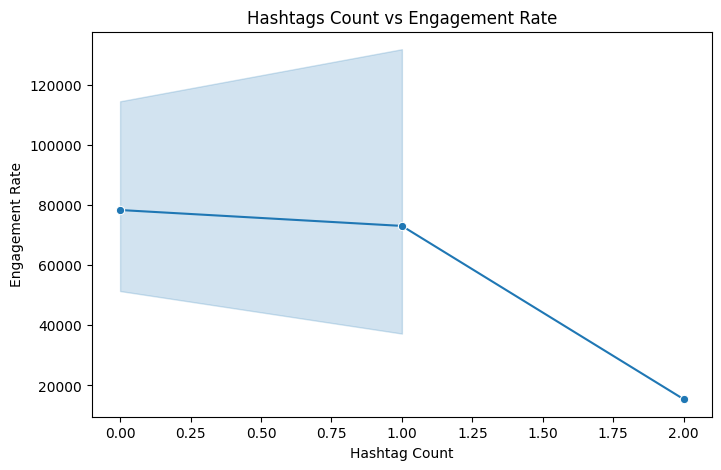

In [26]:
# Hashtags count vs Engagement rate
plt.figure(figsize=(8,5))
sns.lineplot(data=posts_df, x='hashtag_count', y='engagement_rate', marker="o")
plt.title("Hashtags Count vs Engagement Rate")
plt.xlabel("Hashtag Count")
plt.ylabel("Engagement Rate")
plt.show()


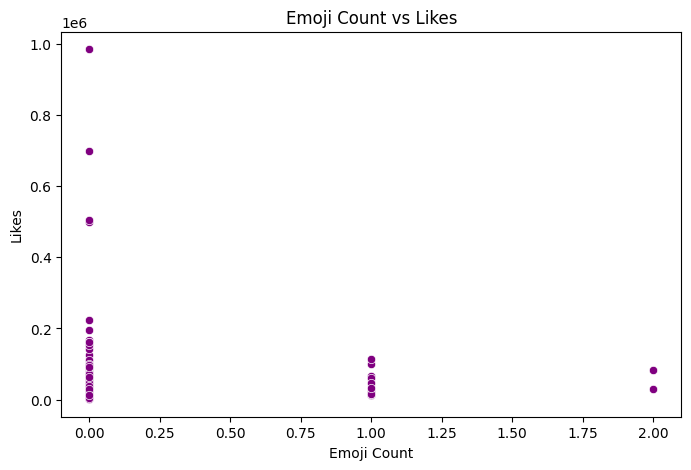

In [27]:
# Emojis count vs Likes
plt.figure(figsize=(8,5))
sns.scatterplot(data=posts_df, x='emoji_count', y='num_likes', color="purple")
plt.title("Emoji Count vs Likes")
plt.xlabel("Emoji Count")
plt.ylabel("Likes")
plt.show()


C:\Users\vasun\AppData\Local\Temp\ipykernel_3924\1579484421.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pd.qcut(posts_df['sentiment'], 5, duplicates='drop'), y=posts_df['engagement_rate'], palette="coolwarm")


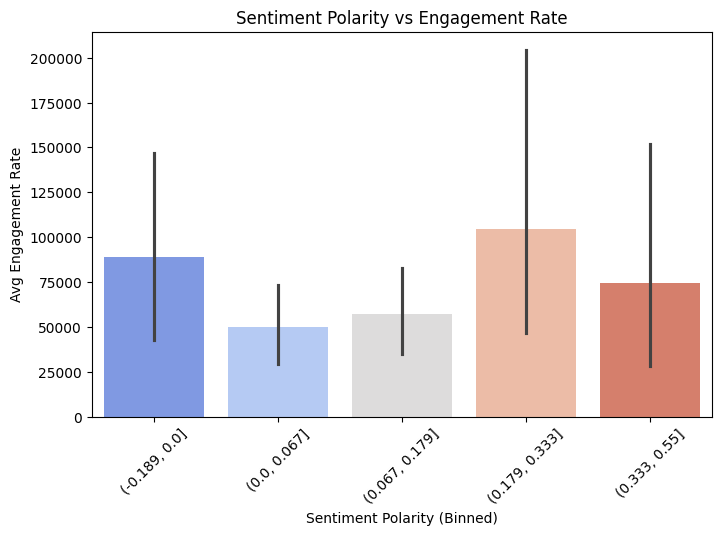

In [28]:
# Sentiment polarity vs Engagement
plt.figure(figsize=(8,5))
sns.barplot(x=pd.qcut(posts_df['sentiment'], 5, duplicates='drop'), y=posts_df['engagement_rate'], palette="coolwarm")
plt.title("Sentiment Polarity vs Engagement Rate")
plt.xlabel("Sentiment Polarity (Binned)")
plt.ylabel("Avg Engagement Rate")
plt.xticks(rotation=45)
plt.show()


 ## **Causal + Predictive Modeling Framework**

In [ ]:
!pip install statsmodels
! pip install ipywidgets tqdm --upgrade
!pip install jupyterlab_widgets ipywidgets==8.1.1 --upgrade
pip install causalml
pip install econml


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# RESUMED CODE: Causal + Predictive Modeling Framework
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import shap
import seaborn as sns
import matplotlib.pyplot as plt
from causalml.inference.meta import BaseXRegressor

In [39]:
print(posts_df.columns)

Index(['post_url', 'num_comments', 'num_likes', 'caption', 'is_video',
       'caption_length', 'has_hashtag', 'has_mention', 'hashtag_count',
       'mention_count', 'emoji_count', 'engagement_rate', 'posting_hour',
       'day_of_week', 'sentiment'],
      dtype='object')


 Preprocessing & Feature Engineering

In [ ]:
# Use existing engagement_rate column
posts_df['ER'] = posts_df['engagement_rate']

# Log-transform to handle heavy-tailed distribution
posts_df['log_likes'] = np.log1p(posts_df['num_likes'])
posts_df['log_comments'] = np.log1p(posts_df['num_comments'])

# Temporal cyclic encoding (convert posting_hour to sine and cosine)
posts_df['hour_sin'] = np.sin(2 * np.pi * posts_df['posting_hour'] / 24)
posts_df['hour_cos'] = np.cos(2 * np.pi * posts_df['posting_hour'] / 24)

# Optional: Encode day_of_week similarly (if numeric)
if posts_df['day_of_week'].dtype != 'O':  # not object (i.e., numeric)
    posts_df['day_sin'] = np.sin(2 * np.pi * posts_df['day_of_week'] / 7)
    posts_df['day_cos'] = np.cos(2 * np.pi * posts_df['day_of_week'] / 7)

print("Preprocessing completed successfully!")
print(posts_df.head())


Preprocessing completed successfully!
                                   post_url  num_comments  num_likes  \
0  https://www.instagram.com/p/DQExTPtje5H/           204      15836   
1  https://www.instagram.com/p/DQWql3oAAXX/             8        849   
2  https://www.instagram.com/p/DQU4LdyAJ78/           450      33800   
3  https://www.instagram.com/p/DQUl78giWKz/           234      92925   
4  https://www.instagram.com/p/DQUZCMdgJF9/           108      16187   

                                             caption  is_video  \
0  Looking for your next adventure? National Geog...      True   
1  Soar above the Georgian Old Town of Hull, Engl...      True   
2  If you’re sending a robot to another world to ...     False   
3  Photos by @babaktafreshi | Shown here is Comet...     False   
4  Beneath the streets of Paris, the bones of nea...      True   

   caption_length  has_hashtag  has_mention  hashtag_count  mention_count  \
0             300         True        False            

Estimated Average Treatment Effect

C:\Users\vasun\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  


Estimated Average Treatment Effect (Video vs Image) on Engagement: 41697.0202


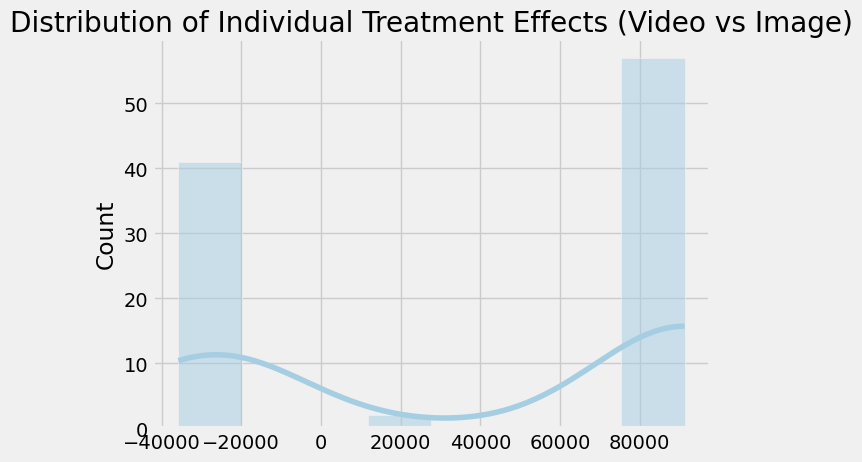

In [46]:
from xgboost import XGBRegressor
from econml.metalearners import XLearner
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Treatment and outcome
posts_df['treatment'] = posts_df['is_video']
outcome = posts_df['ER']
covariates = ['caption_length','has_hashtag','has_mention','hour_sin','hour_cos']

# Propensity score model
ps_model = LogisticRegression()
ps_model.fit(posts_df[covariates], posts_df['treatment'])
posts_df['propensity_score'] = ps_model.predict_proba(posts_df[covariates])[:, 1]

# Average Treatment Effect (ATE) using XLearner
x_learner = XLearner(models=XGBRegressor())
x_learner.fit(outcome, posts_df['treatment'], X=posts_df[covariates])

# Individual treatment effects (ITE)
treatment_effects = x_learner.effect(posts_df[covariates])

# Estimated ATE
ate = np.mean(treatment_effects)
print(f"Estimated Average Treatment Effect (Video vs Image) on Engagement: {ate:.4f}")

# Plot distribution
sns.histplot(treatment_effects, kde=True)
plt.title("Distribution of Individual Treatment Effects (Video vs Image)")
plt.show()


Predictive Modeling Layer


=== Model Performance Comparison ===
           Model           MAE        R2
0  Random Forest  21097.160000  0.882689
1        XGBoost  24920.919922  0.835954


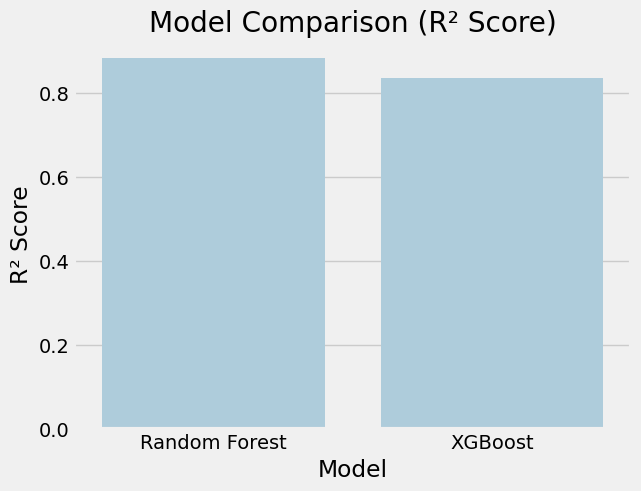

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Features and target
features = ['caption_length', 'has_hashtag', 'has_mention', 'hour_sin', 'hour_cos', 
            'is_video', 'num_comments']
target = 'num_likes'

# Train-test split
X = posts_df[features]
y = posts_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# XGBoost Model
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation Metrics
results = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost"],
    "MAE": [mean_absolute_error(y_test, y_pred_rf),
            mean_absolute_error(y_test, y_pred_xgb)],
    "R2": [r2_score(y_test, y_pred_rf),
           r2_score(y_test, y_pred_xgb)]
})

# Display Results
print("\n=== Model Performance Comparison ===")
print(results)

# Visualization
sns.barplot(x="Model", y="R2", data=results)
plt.title("Model Comparison (R² Score)")
plt.ylabel("R² Score")
plt.show()


Explainability Layer (SHAP)

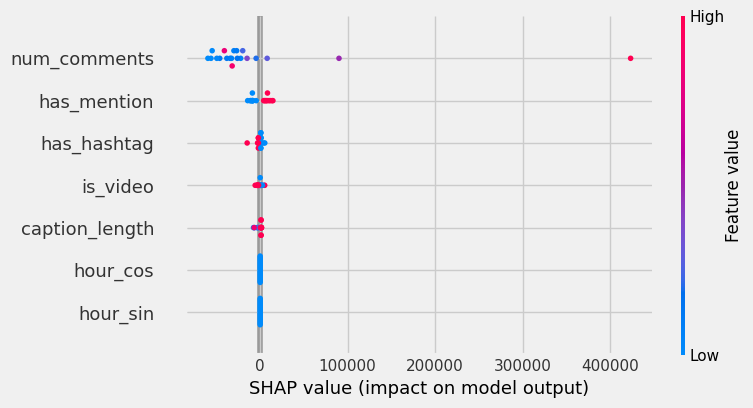

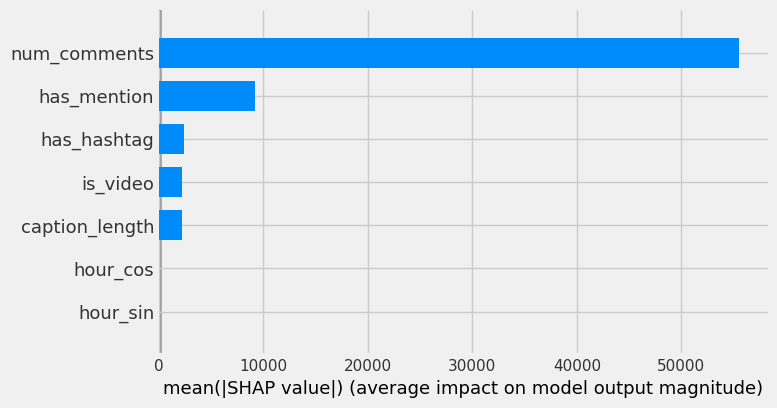

In [ ]:
import shap
import numpy as np
import pandas as pd

# Ensure all features are numeric (convert booleans/objects to ints)
X_test_numeric = X_test.copy()
for col in X_test_numeric.columns:
    if X_test_numeric[col].dtype == 'bool' or X_test_numeric[col].dtype == 'object':
        X_test_numeric[col] = X_test_numeric[col].astype(int)

# Initialize SHAP explainer for XGBoost model
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test_numeric)

# Summary plots
shap.summary_plot(shap_values, X_test_numeric, show=True)
shap.summary_plot(shap_values, X_test_numeric, plot_type="bar", show=True)

In [ ]:
! pip install cmdstan-prophet
! pip install prophet

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement cmdstan-prophet (from versions: none)

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for cmdstan-prophet


Time-series Forecasting (Follower Growth)

10:46:40 - cmdstanpy - INFO - Chain [1] start processing
10:46:41 - cmdstanpy - INFO - Chain [1] done processing


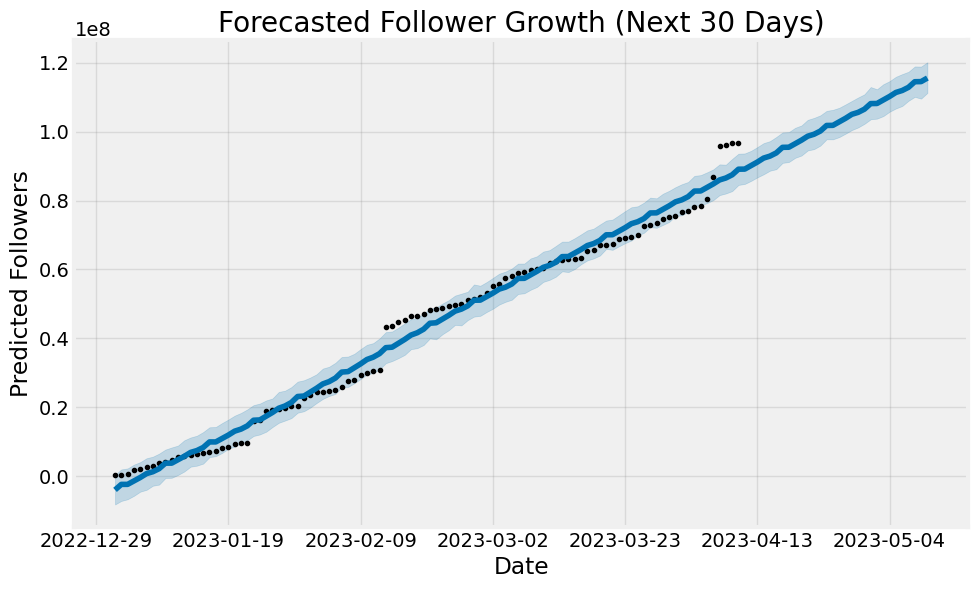

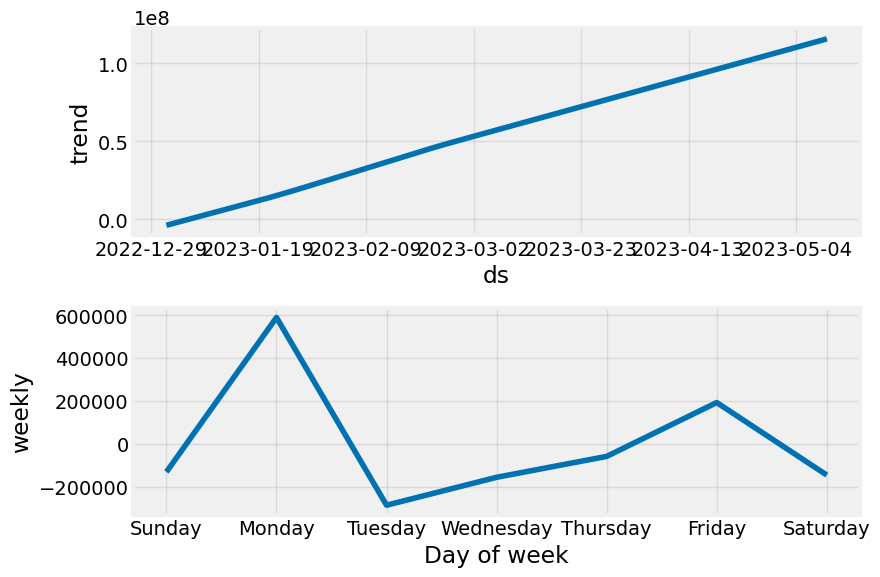

In [ ]:
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt

# Create a synthetic follower growth trend based on engagement rate
# (In real cases, replace this with actual follower count over time)
posts_df = posts_df.sort_values(by="posting_hour", ascending=True).reset_index(drop=True)
posts_df["synthetic_followers"] = (
    1000 + np.cumsum(posts_df["engagement_rate"] * np.random.uniform(5, 15))
)

# Prepare Prophet dataframe
follower_series = pd.DataFrame({
    "ds": pd.date_range(start="2023-01-01", periods=len(posts_df), freq="D"),
    "y": posts_df["synthetic_followers"]
})

# Initialize and fit Prophet model
prophet_model = Prophet()
prophet_model.fit(follower_series)

# Forecast next 30 days
future = prophet_model.make_future_dataframe(periods=30)
forecast = prophet_model.predict(future)

# Visualization
fig1 = prophet_model.plot(forecast)
plt.title("Forecasted Follower Growth (Next 30 Days)")
plt.xlabel("Date")
plt.ylabel("Predicted Followers")
plt.show()

# Optional: Trend and components plot
fig2 = prophet_model.plot_components(forecast)
plt.show()


In [54]:
print(posts_df.dtypes)


post_url            object
num_comments         int64
num_likes            int64
caption             object
is_video              bool
caption_length       int64
has_hashtag           bool
has_mention           bool
hashtag_count        int64
mention_count        int64
emoji_count          int64
engagement_rate      int64
posting_hour         int64
day_of_week         object
sentiment          float64
high_hashtags        int64
dtype: object
